In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [30]:
gold_dataset= pd.read_csv("gld_price_data.csv")
gold_dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [31]:
gold_dataset.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [32]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [33]:
X= gold_dataset.drop(['EUR/USD', 'Date'], axis= 1)
X

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.1800
1,1447.160034,85.570000,78.370003,15.2850
2,1411.630005,85.129997,77.309998,15.1670
3,1416.180054,84.769997,75.500000,15.0530
4,1390.189941,86.779999,76.059998,15.5900
...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100
2286,2697.790039,124.330002,14.370000,15.5300
2287,2723.070068,125.180000,14.410000,15.7400
2288,2730.129883,124.489998,14.380000,15.5600


In [34]:
corr= X.corr()
corr

,SPX,GLD,USO,SLV
SPX,1.000000,0.049345,-0.591573,-0.274055
GLD,0.049345,1.000000,-0.186360,0.866632
USO,-0.591573,-0.186360,1.000000,0.167547
SLV,-0.274055,0.866632,0.167547,1.000000


In [35]:
## since, the data is not linear, theresfore we cannot use the Linear regression here. 
## Therefore we use random forest regressor imported form sklearn.ensemble here.

In [36]:
Y= gold_dataset['EUR/USD']
Y

0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64

In [37]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y, test_size= 0.1, random_state= 42)

In [38]:
model= RandomForestRegressor()
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
# prediction on the trained data

In [51]:
predict_X_train= model.predict(X_train)
r2_train= r2_score(Y_train, predict_X_train)
r2_train*100

99.74958093143333

In [ ]:
# predcition on the test data

In [54]:
predict_X_test= model.predict(X_test)
r2_test= r2_score(Y_test, predict_X_test)
r2_test*100

98.8008031205632

<function matplotlib.pyplot.show(close=None, block=None)>

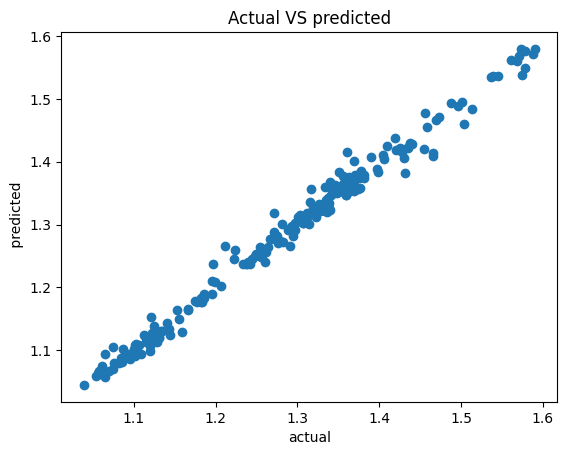

In [61]:
plt.scatter(Y_test, predict_X_test)
plt.xlabel("actual")
plt.ylabel(" predicted")
plt.title("Actual VS predicted")
plt.show